Python Data science Handbook

SciKit-Learn

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


c:\Users\einst\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


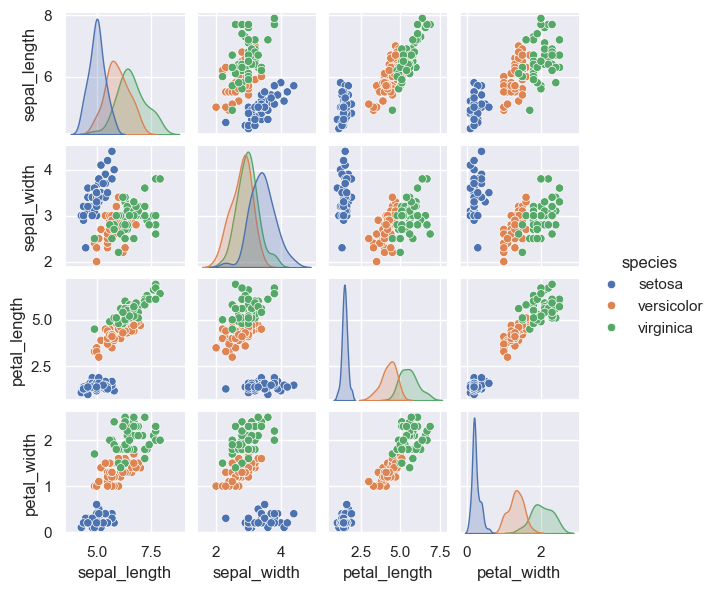

In [3]:
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [4]:
#Feature Matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape


(150, 4)

In [5]:
#Target array
y_iris = iris['species']
y_iris.shape



(150,)

Supervised learning example: Simple linear regression


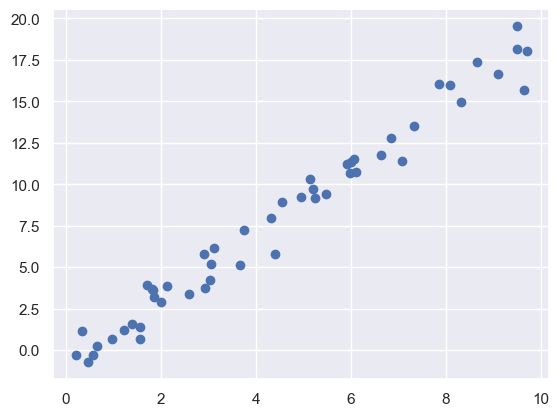

In [6]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [8]:
#Arrange data 
X=x[:,np.newaxis]
print(X)
print(X.shape)

[[3.74540119]
 [9.50714306]
 [7.31993942]
 [5.98658484]
 [1.5601864 ]
 [1.5599452 ]
 [0.58083612]
 [8.66176146]
 [6.01115012]
 [7.08072578]
 [0.20584494]
 [9.69909852]
 [8.32442641]
 [2.12339111]
 [1.81824967]
 [1.8340451 ]
 [3.04242243]
 [5.24756432]
 [4.31945019]
 [2.9122914 ]
 [6.11852895]
 [1.39493861]
 [2.92144649]
 [3.66361843]
 [4.56069984]
 [7.85175961]
 [1.99673782]
 [5.14234438]
 [5.92414569]
 [0.46450413]
 [6.07544852]
 [1.70524124]
 [0.65051593]
 [9.48885537]
 [9.65632033]
 [8.08397348]
 [3.04613769]
 [0.97672114]
 [6.84233027]
 [4.40152494]
 [1.22038235]
 [4.9517691 ]
 [0.34388521]
 [9.09320402]
 [2.58779982]
 [6.62522284]
 [3.11711076]
 [5.20068021]
 [5.46710279]
 [1.84854456]]
(50, 1)


In [9]:
#Fit the model to your data
model.fit(X, y)

LinearRegression()

In [10]:
#results
print(model.coef_) #slope
print(model.intercept_) #intercept

#Page 351

[1.9776566]
-0.903310725531111


Predict labels for unknown data

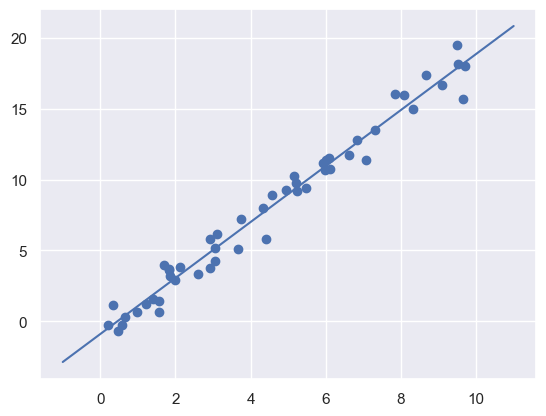

In [11]:
#Once the model is trained, the main task of supervised machine learning is to
#evaluate it based on what it says about new data that was not part of the training
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);

Supervised learning example: Iris classification

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
random_state=1)

In [13]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
#Gaussian Naive Bayes
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data

In [14]:
#Finally, we can use the accuracy_score utility to see the fraction of predicted labels
#that match their true value:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Unsupervised learning example: Iris dimensionality

In [15]:
#convert the four dimentional iris data into a less dimensional (2D) set that can describe the data
#PCA is Principal Component Analysis
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

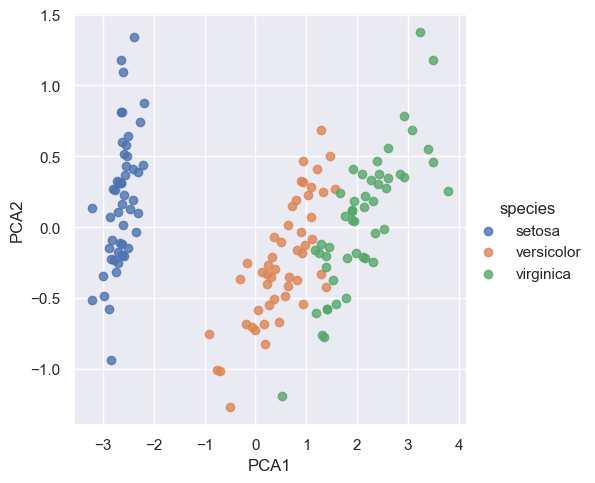

In [16]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x="PCA1",y= "PCA2", hue='species', data=iris, fit_reg=False)

Unsupervised learning: Iris clustering

In [17]:
#get clusters without reference to any label
#Gaussian Mixture Model
from sklearn import mixture# 1. Choose the model class
model = mixture.GaussianMixture(n_components=3,covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

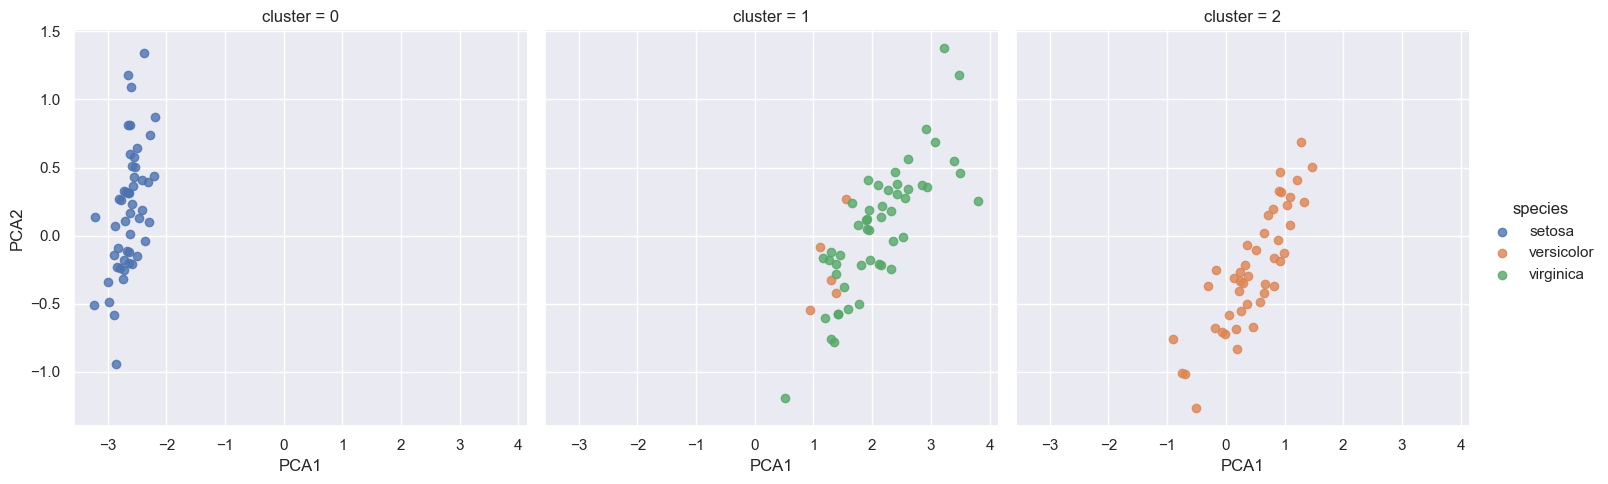

In [18]:
iris['cluster'] = y_gmm
sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',col='cluster', fit_reg=False);
#k-means clusters


Application: Exploring Handwritten Digits

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape
#The images data is a three-dimensional array: 1,797 samples, each consisting of an
#8×8 grid of pixels. Let’s visualize the first hundred of these

(1797, 8, 8)

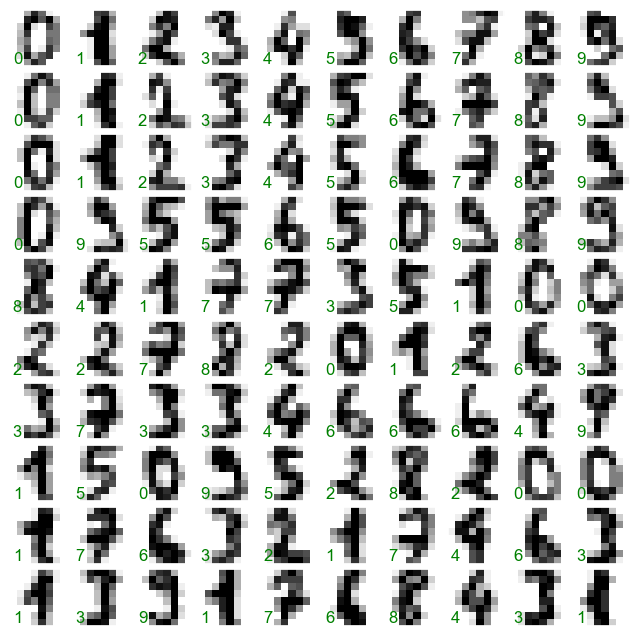

In [20]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

In [21]:
X = digits.data
X.shape

(1797, 64)

In [22]:
y = digits.target
y.shape
#We see here that there are 1,797 samples and 64 features.

(1797,)

Unsupervised learning: Dimensionality reduction

In [23]:
#reduce 64 dimensions to 2 dimensions 
#manifold learning algorithm called Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

c:\Users\einst\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\einst\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

C:\Users\einst\AppData\Local\Temp\ipykernel_28448\3524066099.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


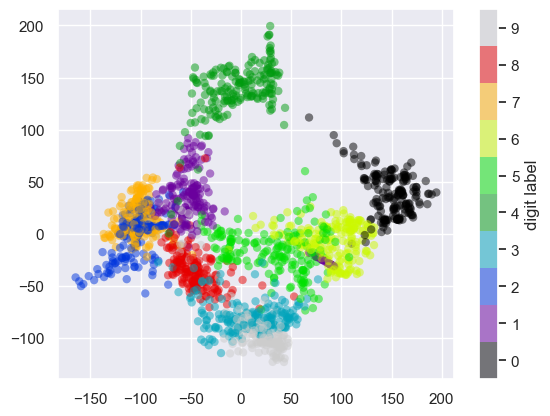

In [24]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Clasification on digits

In [25]:
#split the data into a training and test set, and fit a Gaussian naive Bayes model
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [26]:
#Now that we have predicted our model, we can gauge its accuracy
#by comparing the true values of the test set to the predictions
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

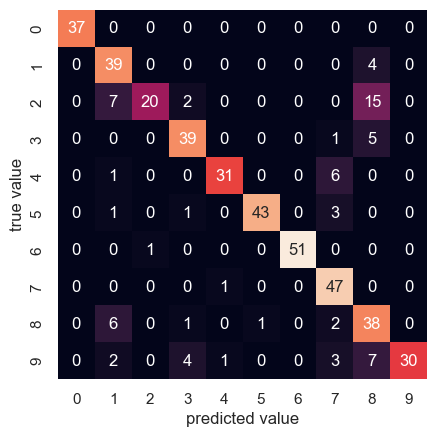

In [27]:
#However, this single number doesn’t tell us where we’ve gone wrong
#use the confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');


Model validation the right way: Holdout sets

In [29]:
#better sense of a model’s performance using what’s known as a holdout set
#split the data into train and test an then compare the test to the true value
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.8342602892102335

In [30]:
#you loose half your data. Cross validation usas una mitad para train y test y despues las inviertes
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.844097995545657, 0.8342602892102335)

In [31]:
#split the data even more into 5 groups
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.78055556, 0.78333333, 0.79387187, 0.8718663 , 0.80501393])

In [33]:
#mas extremo aun dejar solo un dato para test
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 0., ..., 1., 1., 1.])

In [34]:
scores.mean()


0.8408458542014469

Validation curves in Scikit-Learn

In [1]:
#polinomial regresion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [6]:
#Now let’s create some data to which we will fit our model
import numpy as np
def make_data(N, err=1.0, rseed=1):
# randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y
X, y = make_data(40)

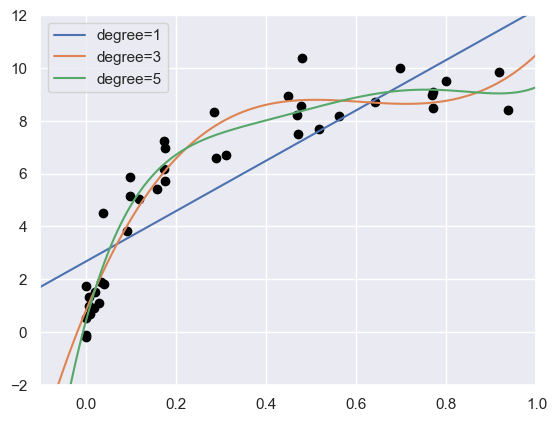

In [7]:
#We can now visualize our data, along with polynomial fits of several 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

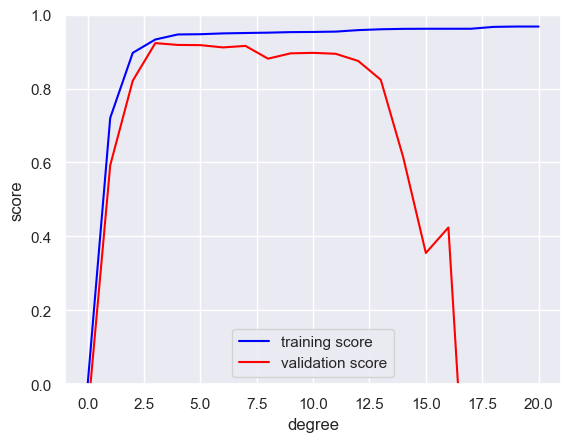

In [19]:
#Given a model, data, parameter name, and a
#range to explore, this function will automatically compute both the training score and
#validation score across the range

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X,y,param_name='polynomialfeatures__degree', param_range=degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

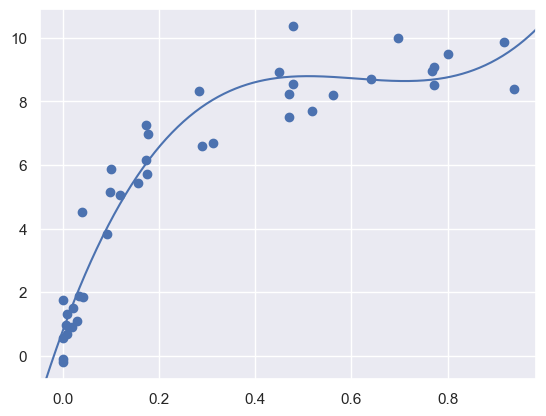

In [20]:
#From the validation curve, we can read off that the optimal trade-off between bias
#and variance is found for a third-order polynomial; we can compute and display this
#fit over the original data as follows
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Learning Curves

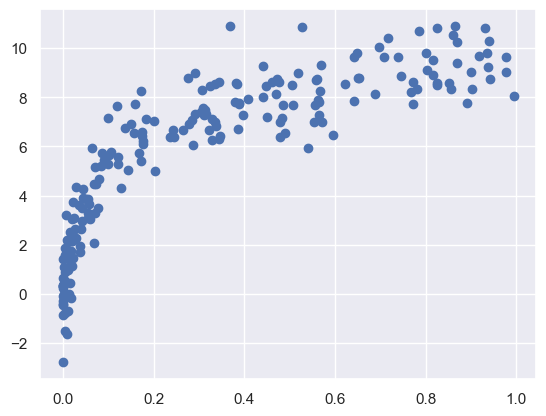

In [22]:
#larger data set
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

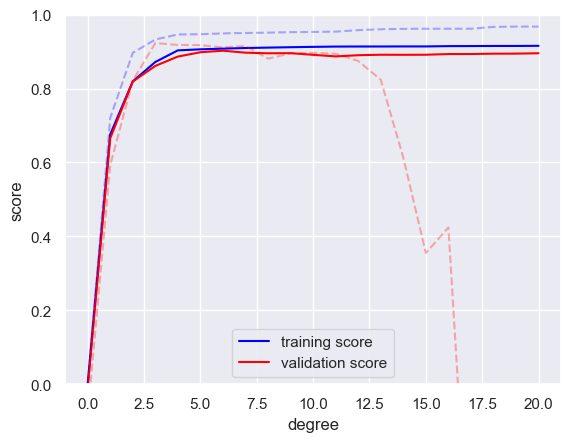

In [24]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
param_name='polynomialfeatures__degree',param_range=degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
#The solid lines show the new results, while the fainter dashed lines show the results of
#the previous smaller dataset.

Learning curves in Scikit-Learn

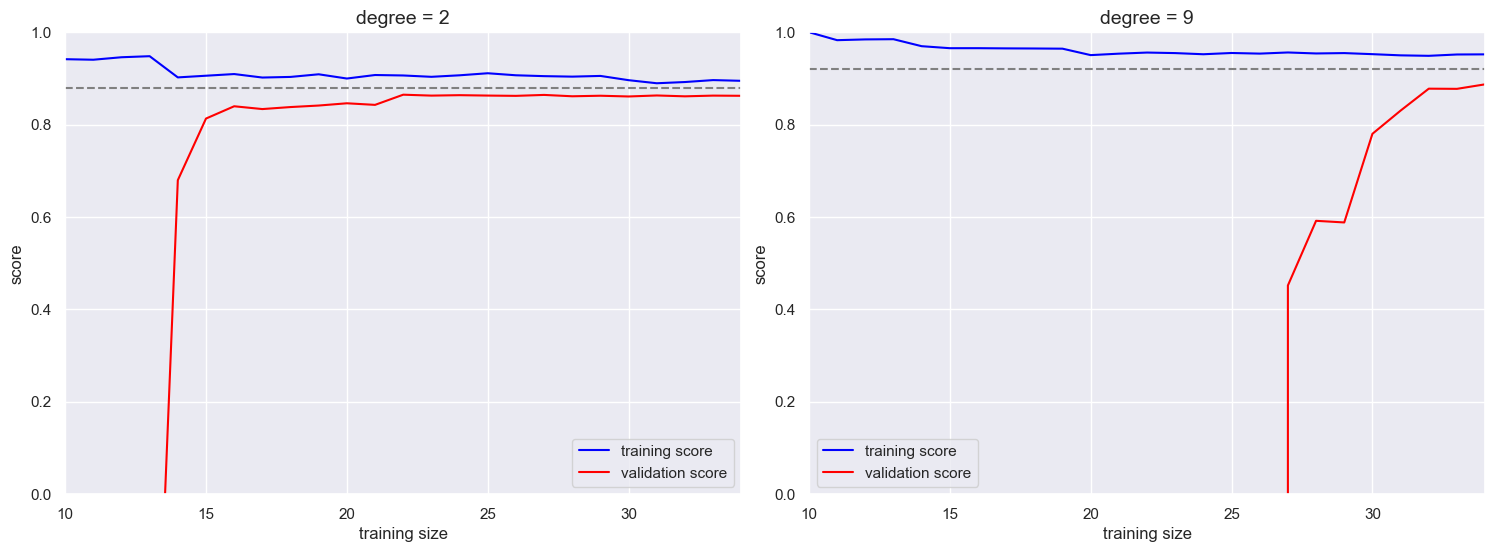

In [33]:
#here we will compute a learning curve for our original dataset with a secondorder
#polynomial model and a ninth-order polynomial
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),X, y, cv=7,train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')



Validation in Practice: Grid Search

In [37]:
#using grid search to find the optimal polynomial model
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),'linearregression__fit_intercept': [True, False],}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [38]:
#the fit() method will fit the model at each grid point, keeping track of the scores
grid.fit(X, y);
#Now that this is fit, we can ask for the best parameters as follows:
grid.best_params_


{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

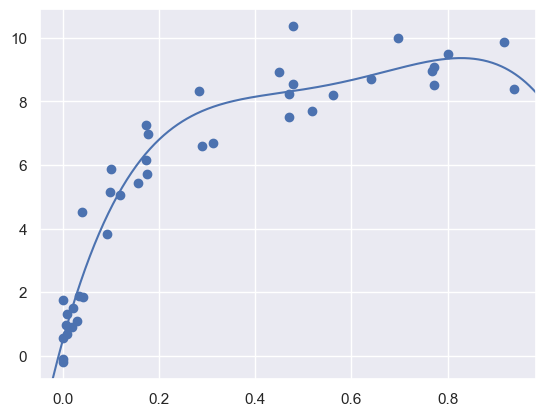

In [40]:
#we can use the best model and show the fit to our data using code from before
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test,);
plt.axis(lim);

Feature Engineering

Categorical Features

In [41]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [42]:
#one proven technique is to use one-hot encoding, which effectively creates
#extra columns indicating the presence or absence of a category with a value of 1 or 0,
#respectively.
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

#Notice that the neighborhood column has been expanded into three separate columns,
#representing the three neighborhood labels, and that each row has a 1 in the column
#associated with its neighborhood.

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [46]:
#To see the meaning of each column, you can inspect the feature names:
vec.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)